In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
import sys
sys.path.append("../../Function/")
import function
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [2]:
df1 = pd.read_excel("../../../site_info_ver_3.3.xlsx")

In [4]:
df = df1.copy()
df = df[df.region_South==1]
df.drop( ['nox' , 'pm10', 'pm2.5','so2' ],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df = function.split_date(df)
df.shape

Split Data Successfully


(24323, 84)

In [5]:
# df = df.dropna(axis = 1)
dummies = pd.get_dummies(df, 'Site_Name')
print(dummies.shape)
dummies.set_index('Date',inplace=True)
dummies.sort_index(inplace=True)
print(dummies.shape)

# dummies.drop(['Model_number'] , axis = 1, inplace = True)
# dummies = dummies.astype({'Total':np.float64,'Israelis_Count':np.float64, 'Tourists_Count':np.float64})
dummies.isna().any().sum()
print(dummies.shape)

# dummies = function.remove_outliers(dummies, 'Israelis_Count')
dummies.dropna(inplace=True)
print(dummies.shape)


(24323, 96)
(24323, 95)
(24323, 95)
(24323, 95)


In [6]:
poly_res = pd.read_excel("../POLI/poly.xlsx")
# writer = pd.ExcelWriter('../../poly.xlsx', engine='xlsxwriter')
print(dummies.shape)

(24323, 95)


In [7]:
cols_corr = function.remove_high_corr(dummies.drop(['Total' , 'Tourists_Count' ],axis=1), 'Israelis_Count', 0.4)
dummies.drop(cols_corr,axis=1,inplace=True)
cols_corr


['special_activity',
 'is_jewish_vacation',
 'is_jewishHeritage',
 'Beer-Sheva_pm10',
 'is_muslims_vacation',
 'is_heritage',
 'Site_Name_En Avdat',
 'year',
 'is_Site_exceeded_nox',
 'is_natureReserve',
 'Site_Name_HaBsor(Eshkol Park)',
 'Haifa_pm10',
 'Site_Name_Hay-Bar Yotvata',
 'Jerusalem_pm10_exceeded',
 'Site_Name_Eilat Coral Beach',
 'Jerusalem_pm2.5',
 'Jerusalem_so2',
 'Haifa_nox',
 'Tel_Aviv-Yafo_so2',
 'Site_Name_Khan Be’erot',
 'Site_Name_Tel Beer Sheva',
 'Beer-Sheva_nox_exceeded',
 'Season_spring',
 'Haifa_so2_exceeded',
 'Site_Name_Tel Arad',
 'Beer-Sheva_nox',
 'Season_winter',
 'Jerusalem_pm10',
 'month',
 'Site_Name_Mamshit',
 'Jerusalem_pm2.5_exceeded',
 'Site_Name_Hai Ramon',
 'is_nationalPark',
 'Tel_Aviv-Yafo_pm10',
 'is_camping',
 'Ashkelon_pm2.5',
 'Beer-Sheva_pm2.5_exceeded',
 'Tel_Aviv-Yafo_pm2.5',
 'Haifa_pm2.5',
 'Beer-Sheva_pm2.5',
 'Ashkelon_nox_exceeded',
 'Ashkelon_pm10',
 'Temperature']

In [8]:
dd = dict.fromkeys(dummies.select_dtypes(np.float64).columns, np.float32)
d = dict.fromkeys(dummies.select_dtypes(np.int64).columns, np.int32)

In [9]:
dummies = dummies.astype(d)
dummies = dummies.astype(dd)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24323 entries, 2016-01-01 to 2021-08-11
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Israelis_Count                24323 non-null  int32  
 1   Tourists_Count                24323 non-null  int32  
 2   Total                         24323 non-null  int32  
 3   region_Central                24323 non-null  int32  
 4   region_Judea_Samaria          24323 non-null  int32  
 5   region_North                  24323 non-null  int32  
 6   region_South                  24323 non-null  int32  
 7   is_weekend                    24323 non-null  int32  
 8   operations                    24323 non-null  int32  
 9   is_jewish_holiday             24323 non-null  int32  
 10  is_muslims_holiday            24323 non-null  int32  
 11  visit_duration                24323 non-null  int32  
 12  is_muslimsHeritage            24323 non-nul

In [10]:
size = round(len(dummies)*.8)
dataset_train = dummies[:size]
dataset_test = dummies[size:]

targets = ['Total' , 'Israelis_Count', 'Tourists_Count' ]
X_train = dataset_train.drop(targets,axis=1)
y_train = dataset_train['Israelis_Count']

X_test = dataset_test.drop(targets,axis=1)
y_test = dataset_test['Israelis_Count']

print('train x shape:',X_train.shape)
print('train y shape:',y_train.shape)
print('test x shape:',X_test.shape)
print('test y shape:',y_test.shape)

train x shape: (19458, 49)
train y shape: (19458,)
test x shape: (4865, 49)
test y shape: (4865,)


In [18]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Normalizer 
train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()
train_targer_scaler = MinMaxScaler()
test_targer_scaler = MinMaxScaler()

X_train_scaled = train_scaler.fit_transform(X_train)
y_train_scaled = train_targer_scaler.fit_transform(np.log([y_train.values+0.01]).T)
X_test_scaled = test_scaler.fit_transform(X_test)
y_test_scaled = test_targer_scaler.fit_transform(np.log([y_test.values+0.01]).T)

print('train x shape:',X_train_scaled.shape)
print('train y shape:',y_train_scaled.shape)
print('test x shape:',X_test_scaled.shape)
print('test y shape:',y_test_scaled.shape)


train x shape: (19458, 49)
train y shape: (19458, 1)
test x shape: (4865, 49)
test y shape: (4865, 1)


In [19]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19458 entries, 2016-01-01 to 2020-03-07
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Israelis_Count                19458 non-null  int32  
 1   Tourists_Count                19458 non-null  int32  
 2   Total                         19458 non-null  int32  
 3   region_Central                19458 non-null  int32  
 4   region_Judea_Samaria          19458 non-null  int32  
 5   region_North                  19458 non-null  int32  
 6   region_South                  19458 non-null  int32  
 7   is_weekend                    19458 non-null  int32  
 8   operations                    19458 non-null  int32  
 9   is_jewish_holiday             19458 non-null  int32  
 10  is_muslims_holiday            19458 non-null  int32  
 11  visit_duration                19458 non-null  int32  
 12  is_muslimsHeritage            19458 non-nul

In [20]:
poly = PolynomialFeatures(degree=2)
        
#fit the x variable to fit a 2rd degree polynomial value
X_poly = poly.fit_transform(X_train_scaled)
print(X_poly.shape)
poly.fit(X_poly, y_train_scaled)

pol_lin_reg = LinearRegression()
pol_lin_reg.fit(X_poly, y_train_scaled)



(19458, 1275)


LinearRegression()

In [26]:
#predict the training data
predicion_scaled = pol_lin_reg.predict(poly.fit_transform(X_test_scaled))
#predicion = y_train_scaler.inverse_transform(predicion_scaled)
predicion = predicion_scaled
#create a pandas series of the results

predicion = round(pd.Series(predicion.reshape(predicion.shape[0]), index=y_test.index, name='predicted_entries_train'),ndigits=2)
predicion


Date
2020-03-08    1.055461e+12
2020-03-08    1.090469e+12
2020-03-08    1.090469e+12
2020-03-08    1.090469e+12
2020-03-08    1.090469e+12
                  ...     
2021-08-11    1.161112e+12
2021-08-11    1.161112e+12
2021-08-11    1.208884e+12
2021-08-11    1.173876e+12
2021-08-11    1.161112e+12
Name: predicted_entries_train, Length: 4865, dtype: float64

In [22]:
res = pd.DataFrame(data={
    'Predicion':predicion.values,
    'Actual':y_test.values}
    ,index=y_test.index)
res[['Predicion']][res.Predicion>10000] = max(res.Actual)+1000
res[res.Predicion>10000]
res.sort_index(inplace=True)

C:\Users\asars\AppData\Local\Temp/ipykernel_17088/977811463.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[['Predicion']][res.Predicion>10000] = max(res.Actual)+1000
C:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [23]:
res

,Predicion,Actual
Date,,
2020-03-08,inf,5
2020-03-08,inf,25
2020-03-08,inf,22
2020-03-08,inf,155
2020-03-08,inf,14
...,...,...
2021-08-11,inf,78
2021-08-11,inf,97
2021-08-11,inf,789


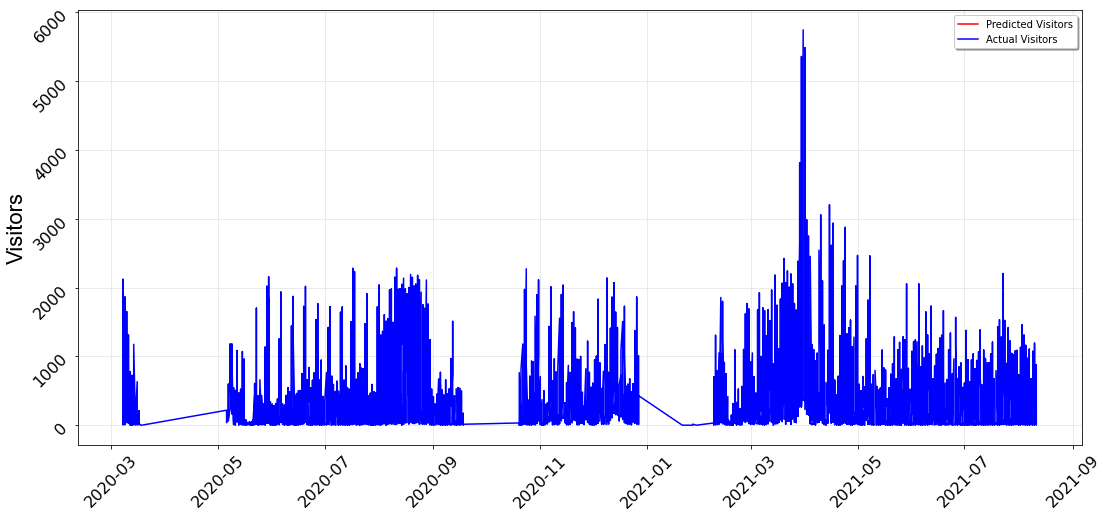

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


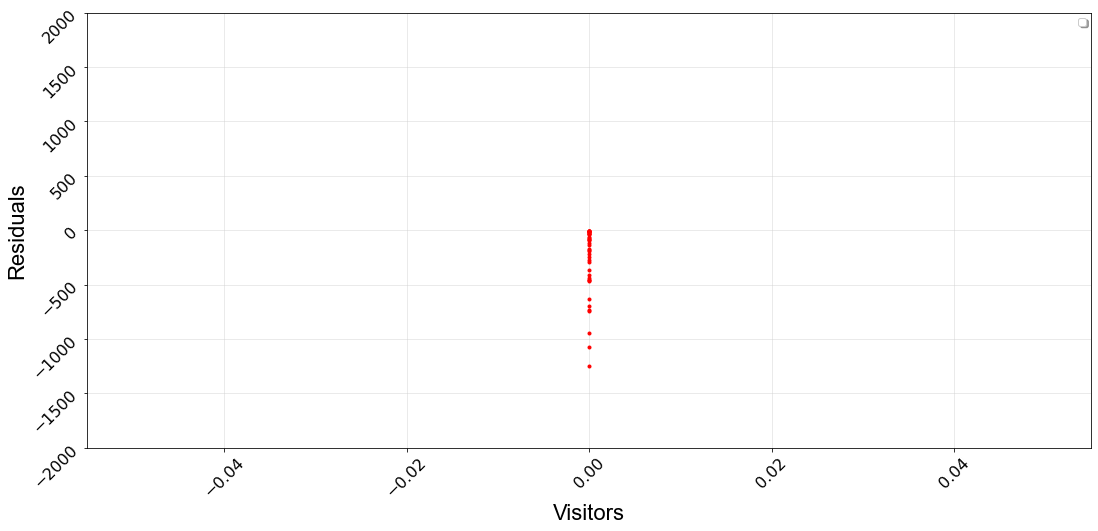

In [24]:
function.plot_line(res.Predicion, res.Actual)
function.plot_residuals(res.Predicion, res.Actual,ylim=(-2000,2000))